In [1]:
import pybamm
import matplotlib.pyplot as plt
import numpy as np
model = pybamm.lithium_ion.DFN(options={"calculate discharge energy":"true"})
for event in model.events: 
    if event.name == "Zero electrolyte concentration cut-off":
        model.events.remove(event)
chem = pybamm.parameter_sets.Chen2020 #Cell Chemistry
#chem 

In [ ]:

Parameter_values = pybamm.ParameterValues(chemistry=chem)
# Set number of var_pts for the mesh
var = pybamm.standard_spatial_vars
var_pts = {var.x_n: 20, var.x_s: 20, var.x_p:400, var.r_n: 150, var.r_p: 20}
C_rates = np.arange(0.2,10.2,0.2).tolist()
sims = []

for C_rate in C_rates:
  #Parameter_values["Current function [A]"] = 5 * C_rate
  #sim = pybamm.Simulation(model, parameter_values=Parameter_values)
  #sim.solve([0, 4000 / C_rate])
  #sims.append(sim)
 if C_rate < 2.1:
      t_eval = np.linspace(0, 4000 / C_rate, 500)
      dt_max = None
 elif C_rate < 4:
      t_eval = np.linspace(0, 3500 / C_rate, 1000)
      dt_max = 0.0001
 elif C_rate < 8:
      t_eval = np.linspace(0, 3000 / C_rate, 500)
      dt_max = 0.0001
 else:
      t_eval = np.linspace(0, 60, 500)
      dt_max = 0.0001
 solver = pybamm.CasadiSolver(mode="safe", dt_max=dt_max, max_step_decrease_count=15)
 power = C_rate*15 
 experiment = pybamm.Experiment([f"Discharge at {power} W until 2.5 V"], period="40 seconds")
 sim = pybamm.Simulation(model, parameter_values=Parameter_values, var_pts=var_pts, solver=solver, C_rate=C_rate, experiment=experiment)
 sim.solve()
 sims.append(sim)

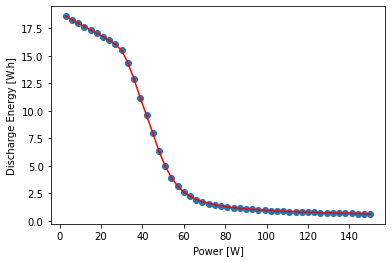

In [9]:
#fig, ax = plt.subplots()
plt.xlabel("Power [W]")
plt.ylabel("Discharge Energy [W.h]")
Energy = [sol.solution["Discharge energy [W.h]"].data[-1] for sol in sims]
Power = [sol.solution["Power [W]"].data[-1] for sol in sims]

plt.scatter(Power, Energy)
plt.plot(Power, Energy, 'r')
plt.show()